In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model




TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
from keras.models import model_from_json

# Load the model architecture from JSON
with open('model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the weights into the model
loaded_model.load_weights('deep.h5')


In [1]:
snippet=128
bands=[ 'B2.tif', 'B3.tif', 'B4.tif', 'B8.tif']
folder_path = "C:/Users/HP/Desktop/multiclass"
all_loc = os.listdir(folder_path)
x_train=np.zeros(shape=(0,snippet,snippet,4))
y_train=np.zeros(shape=(0,snippet,snippet))
# settlements={'loc1':3,'loc2':9}
def extract_snippets(image, snippet_size=(snippet, snippet)):
    snippets = []
    height=image.shape[0]
    width=image.shape[1]
    
    for i in range(0, height, snippet_size[0]):
        for j in range(0, width, snippet_size[1]):
            snippet = image[i:i+snippet_size[0], j:j+snippet_size[1],:]
            snippets.append(snippet)
    return snippets
fold='loc4'
temp=folder_path+"/"+fold
tif_files = [file for file in os.listdir(temp) if file.endswith('.tif')]
tif_files=[ 'B2.tif', 'B3.tif', 'B4.tif', 'B8.tif']
print(tif_files)
im=np.array(Image.open(temp+"/"+tif_files[0]))
data=np.zeros((im.shape[0],im.shape[1],len(bands)))
i=0
for file_name in tif_files:
    im = Image.open(temp+"/"+file_name)
    imarray = np.array(im)
    data[:,:,i]=imarray
    i+=1
data=np.array(data)
# data=data/np.max(data)
print(data.shape)
# lab = Image.open(temp+"/labels/label.tif")
# label=np.array(lab)
# label[label != settlements[fold]] = 0
# label[label == settlements[fold]] = 1
height=data.shape[0]
width=data.shape[1]
pad_height = (height // snippet + 1) * snippet - height
pad_width = (width // snippet + 1) * snippet - width
pad = np.pad(data, ((0, pad_height), (0, pad_width),(0,0)), mode='constant')
# labpad=np.pad(label, ((0, pad_height), (0, pad_width)), mode='constant')
tmp1=np.array(extract_snippets(pad))
# tmp2=np.array(extract_snippets_label(labpad))
x_train=np.concatenate((x_train,tmp1),axis=0)
m1=np.mean(x_train)
print(m1)
# x_train/=m1
# x_train*=1000
# y_train=np.concatenate((y_train,tmp2),axis=0)
print(x_train.shape)
# for i in range(len(bands)):
#     x_train[:,:,:,i]/=np.max(x_train[:,:,:,i])# print(y_train.shape)
ans=loaded_model.predict(x_train)
ans=np.argmax(ans,axis=-1)
ans=ans.reshape(-1,128,128)
output=np.zeros(shape=(pad.shape[0],pad.shape[1]))
ans.shape
height,width=pad.shape[0:2]
k=height//128
l=width//128
for i in range(0, height, 128):
    for j in range(0, width, 128):
        
        output[i:i+128, j:j+128]=ans[(i*l)//(128)+(j//128)]
# result = (output > 0.9).astype(int)
plt.imshow(output)


NameError: name 'os' is not defined

In [18]:
import tifffile
# output=np.round(output)
img = Image.fromarray(output)


# Save the image as a TIFF file
tifffile.imsave("outputold.tif", output)


['B2.tif', 'B3.tif', 'B4.tif', 'B8.tif']
(1169, 1240, 4)
1687.0829240417481
(100, 128, 128, 4)
4/4 [==============================] - 0s 49ms/step


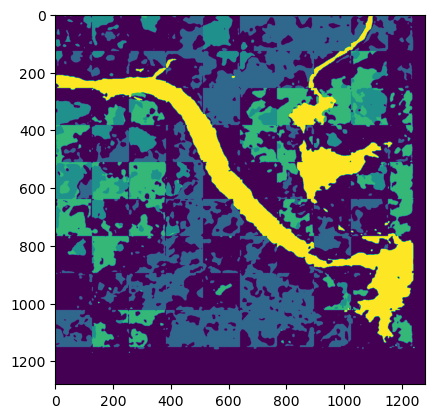

In [19]:
snippet=128
bands=[ 'B2.tif', 'B3.tif', 'B4.tif', 'B8.tif']
folder_path = "C:/Users/HP/Desktop/Testing"
all_loc = os.listdir(folder_path)
x_train=np.zeros(shape=(0,snippet,snippet,4))
y_train=np.zeros(shape=(0,snippet,snippet))
# settlements={'loc1':3,'loc2':9}
def extract_snippets(image, snippet_size=(snippet, snippet)):
    snippets = []
    height=image.shape[0]
    width=image.shape[1]
    
    for i in range(0, height, snippet_size[0]):
        for j in range(0, width, snippet_size[1]):
            snippet = image[i:i+snippet_size[0], j:j+snippet_size[1],:]
            snippets.append(snippet)
    return snippets
fold='sou_2023'
temp=folder_path+"/"+fold
tif_files = [file for file in os.listdir(temp) if file.endswith('.tif')]
tif_files=[ 'B2.tif', 'B3.tif', 'B4.tif', 'B8.tif']
print(tif_files)
im=np.array(Image.open(temp+"/"+tif_files[0]))
data=np.zeros((im.shape[0],im.shape[1],len(bands)))
i=0
for file_name in tif_files:
    im = Image.open(temp+"/"+file_name)
    imarray = np.array(im)
    data[:,:,i]=imarray
    i+=1
data=np.array(data)
# data=data/np.max(data)
print(data.shape)
# lab = Image.open(temp+"/labels/label.tif")
# label=np.array(lab)
# label[label != settlements[fold]] = 0
# label[label == settlements[fold]] = 1
height=data.shape[0]
width=data.shape[1]
pad_height = (height // snippet + 1) * snippet - height
pad_width = (width // snippet + 1) * snippet - width
pad = np.pad(data, ((0, pad_height), (0, pad_width),(0,0)), mode='constant')
# labpad=np.pad(label, ((0, pad_height), (0, pad_width)), mode='constant')
tmp1=np.array(extract_snippets(pad))
# tmp2=np.array(extract_snippets_label(labpad))
x_train=np.concatenate((x_train,tmp1),axis=0)
m2=np.mean(x_train)
print(m2)
# y_train=np.concatenate((y_train,tmp2),axis=0)
print(x_train.shape)
# for i in range(len(bands)):
#     x_train[:,:,:,i]/=np.max(x_train[:,:,:,i])# print(y_train.shape)
x_train=x_train/m2
x_train=x_train*1000
ans=loaded_model.predict(x_train)
ans=np.argmax(ans,axis=-1)
ans=ans.reshape(-1,128,128)
output=np.zeros(shape=(pad.shape[0],pad.shape[1]))
ans.shape
height,width=pad.shape[0:2]
k=height//128
l=width//128
for i in range(0, height, 128):
    for j in range(0, width, 128):
        
        output[i:i+128, j:j+128]=ans[(i*l)//(128)+(j//128)]
# result = (output > 0.9).astype(int)
plt.imshow(output)


In [17]:
np.unique(output)

array([0., 2., 3., 4., 5., 6.])

In [20]:
import tifffile
# output=np.round(output)
img = Image.fromarray(output)


# Save the image as a TIFF file
tifffile.imsave("outputnew.tif", output)


(1280, 1280)
(1280, 1280)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


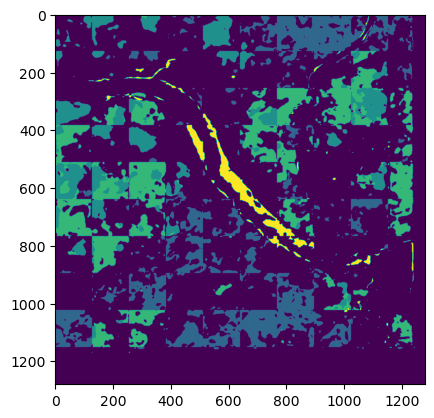

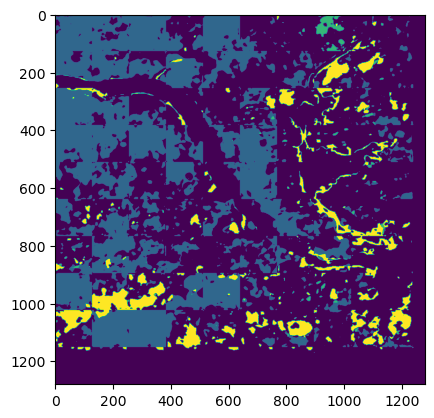

In [21]:

 # import tifffile
# import numpy as np
# import matplotlib.pyplot as plt
# # img1 = tifffile.imread(folder_path+"B2.tif")
# # img2 = tifffile.imread(folder_path+"B3.tif")
# img1 = tifffile.imread("/kaggle/input/results/results_sih/output1.tif")
# img2= tifffile.imread("/kaggle/input/results/results_sih/mask.tif")
# npimg1=np.array(img1)
# npimg2=np.array(img2)
# print(npimg1.shape)
# print(npimg2.shape)
# print(npimg1)
# print(npimg2)
# npimg1=npimg1[:2113,:8588]
# array_shape = npimg1.shape
# forward=np.zeros(array_shape)
# backward=np.zeros(array_shape)
# for i in range(array_shape[0]):
#     for j in range(array_shape[1]):
#         if(npimg1[i,j]!=npimg2[i,j]):
#             forward[i,j]=npimg2[i,j]
#             backward[i,j]=npimg1[i,j]
# print(forward)
# plt.plot(forward)
# plt.show()
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = tifffile.imread("outputold.tif")
img2 = tifffile.imread("outputnew.tif")

# Convert images to NumPy arrays
npimg1 = np.array(img1)
npimg2 = np.array(img2)

# Print shapes and arrays
print(npimg1.shape)
print(npimg2.shape)
print(npimg1)
print(npimg2)

# Trim npimg1 to match the shape of npimg2
# npimg1 = npimg1[:2113, :8588]

# Initialize arrays
array_shape = npimg1.shape
forward = np.zeros(array_shape)
backward = np.zeros(array_shape)
foward=forward.astype(int)
# Identify differences between the two images
for i in range(array_shape[0]):
    for j in range(array_shape[1]):
        if npimg1[i, j] != npimg2[i, j]:
            forward[i, j] = npimg2[i, j]
            backward[i, j] = npimg1[i, j]

# Extract non-zero elements for scatter plot
nonzero_forward = forward[forward != 0]

# Create a scatter plot
# plt.scatter(foward, nonzero_forward, marker='o', s=1)
# x, y = np.meshgrid(np.arange(2113), np.arange(8588))

# Create a scatter plot
# plt.scatter(x.flatten(), y.flatten(), c=foward.flatten(), cmap='viridis', marker='s')

# Show the plot
# plt.show()
plt.imshow(forward)
plt.show()
import tifffile
tifffile.imsave("tifffile1.tiff",forward)
tifffile.imsave("tifffile2.tiff",backward)
plt.imshow(backward)

(1366, 2609)